In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\amita\Desktop\ML Projects\My Projects\Medical Insurance Premium\insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
dataset.isnull().values.sum()

0

In [10]:
dataset.isnull().values.any()

False

In [11]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [13]:
#Group by categorical
dataset_sex = dataset.groupby(by='sex')
dataset_sex.mean()

C:\Users\amita\AppData\Local\Temp\ipykernel_4212\3445538330.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_sex.mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [15]:
dataset_smoker = dataset.groupby('smoker')
dataset_smoker.mean()

C:\Users\amita\AppData\Local\Temp\ipykernel_4212\2993928441.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_smoker.mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [16]:
dataset_region = dataset.groupby('region')
dataset_region.mean()

C:\Users\amita\AppData\Local\Temp\ipykernel_4212\2004204246.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_region.mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [17]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [18]:
#One hot encoding

In [19]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [20]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
dataset = pd.get_dummies(data=dataset,drop_first=True)

In [23]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Plots

In [24]:
dataset_2 = dataset.drop(columns='charges')

<Axes: title={'center': 'Correlation with charges'}>

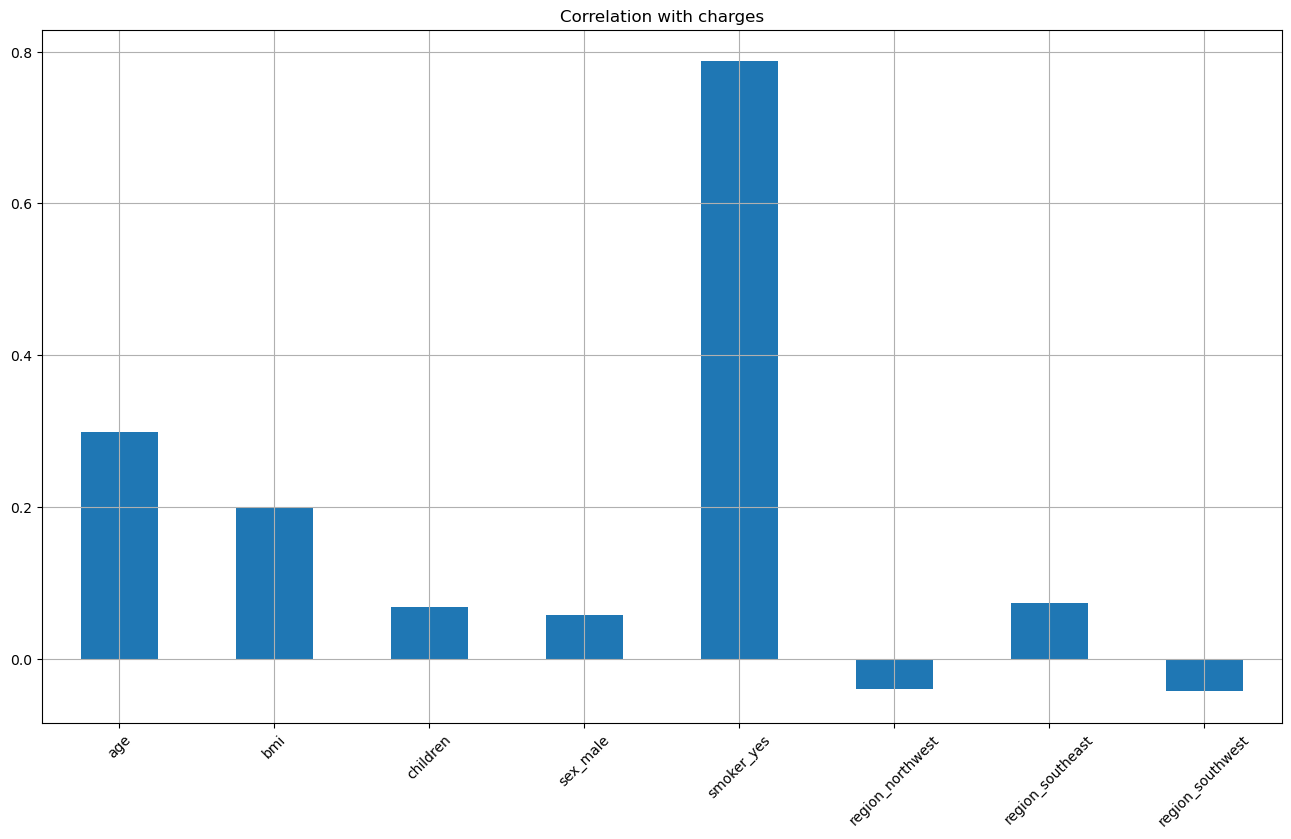

In [25]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title = 'Correlation with charges', 
    rot = 45, grid = True
)

In [27]:
corr = dataset.corr()

In [28]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


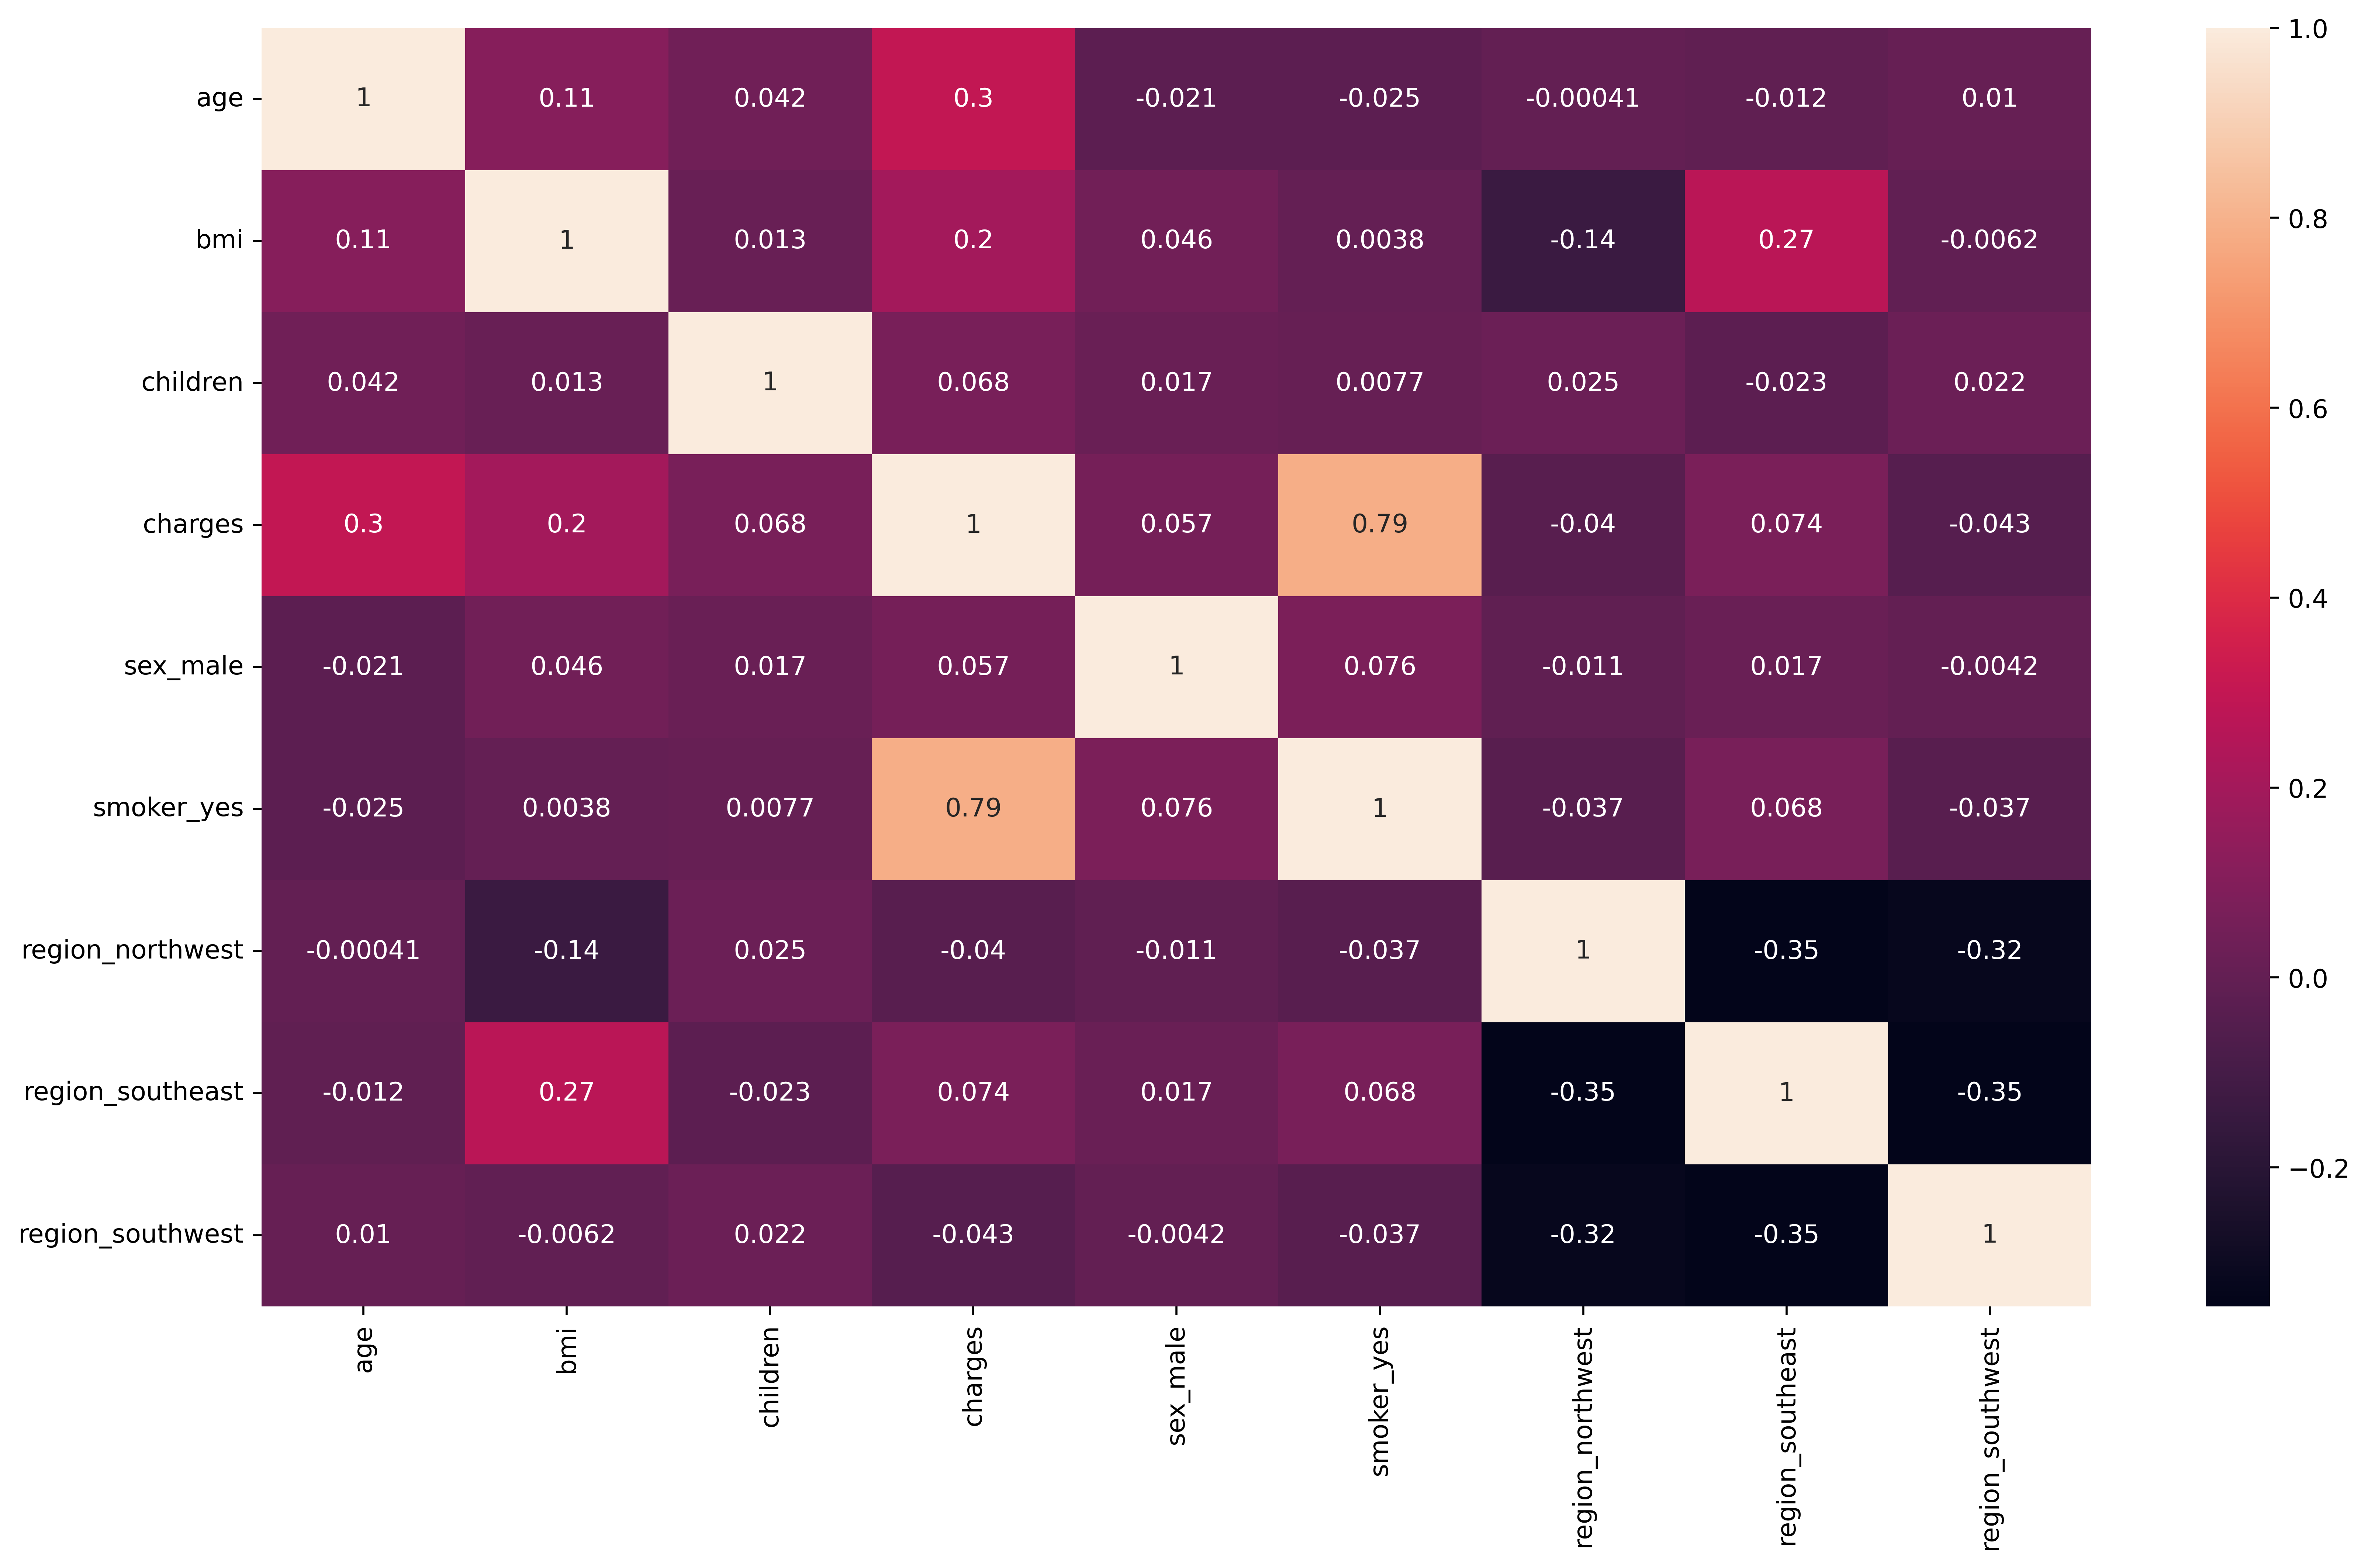

In [30]:
plt.figure(figsize=(16,9),dpi=500)
sns.heatmap(corr,annot = True);

## Split Dataset

In [31]:
x = dataset.drop('charges',axis=1)
y = dataset['charges']

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
x_train.shape

(1070, 8)

In [36]:
x_test.shape

(268, 8)

In [38]:
y_test.shape

(268,)

In [39]:
y_train.shape

(1070,)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

In [42]:
x_train = sc.fit_transform(x_train)

In [43]:
x_test = sc.transform(x_test)

## Model1 = Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = lr_model.predict(x_test)

In [46]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test,y_pred)

0.7999876970680434

## Model2 = Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=5,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [66]:
y_pred = rf_model.predict(x_test)

In [67]:
r2_score(y_test,y_pred)

0.8694262999399472

## Model3 = XGBoost Regressor

In [59]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred = xgb_model.predict(x_test)

In [61]:
r2_score(y_test,y_pred)

0.8630684668596162

## Best Model is among XGBoost and RF but XGBoost is preffered over RF

## Single Prediction

### Example 1

#### Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast

In [68]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [73]:
frank_obs = [[40,45.5,4,1,1,0,0,0,]]

In [74]:
frank_pred = xgb_model.predict(sc.transform(frank_obs))

C:\Users\amita\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
frank_pred

array([47973.6], dtype=float32)

### Example 2

#### Name:Sara, age:19, bmi:27.9, children :0, sex:female, smoker:no, region:northwest

In [76]:
sara_obs = [[19,27.9,0,0,0,1,0,0]]

In [77]:
sara_pred = xgb_model.predict(sc.transform(sara_obs))

C:\Users\amita\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
sara_pred

array([1426.4653], dtype=float32)